In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dhoni=pd.read_excel('dhoni7.xlsx',index_col=0)

In [3]:
dhoni['Date']=pd.to_datetime(dhoni.Date)

In [4]:
dhoni.head()

,Date,Country,Ground,How Dismissed,Runs,B/F,S/R,Format
,,,,,,,,
1,2004-12-23,Bangladesh,MA Aziz Stadium,Run Out,0,1,0.00,ODI
2,2004-12-26,Bangladesh,Bangabandhu National Stadium,Caught,12,11,109.09,ODI
3,2004-12-27,Bangladesh,Bangabandhu National Stadium,Not Out,7,2,350.00,ODI
4,2005-02-04,Pakistan,Nehru Stadium (Kochi),Caught,3,7,42.86,ODI
5,2005-05-04,Pakistan,Dr YS Rajasekhara Reddy Cricket Stadium,Caught,148,123,120.33,ODI


In [5]:
sns.set(color_codes=True)

In [6]:
dhoni['Country']=dhoni.Country.replace({'Bangladesh':'BAN', 'Pakistan':'PAK', 'Sri Lanka':'SL', 'West Indies':'WI',
       'New Zealand':'NZ', 'Zimbabwe':'ZBW', 'South Africa':'SA', 'England':'ENG', 'Australia':'AUS',
       'Bermuda':'BMD', 'ACA Africa XI':'AA XI', 'Scotland':'SCT', 'Hong Kong':'HK', 'Ireland':'IRE',
       'Netherlands':'NL', 'United Arab Emirates':'UAE', 'Afghanistan':'AFG'})

In [7]:
dhoni['How Dismissed']=dhoni['How Dismissed'].replace({'Run Out':'RN', 'Caught':'CA', 'Not Out':'NO', 'Bowled':'BW', 'LBW ':'LB', 
                                                       'DNB':'DN', 'LBW':'LB','Caught ':'CA', ' DNB':'CA', 'stump':'ST'})

In [8]:
dhoni

,Date,Country,Ground,How Dismissed,Runs,B/F,S/R,Format
,,,,,,,,
1,2004-12-23,BAN,MA Aziz Stadium,RN,0,1,0.00,ODI
2,2004-12-26,BAN,Bangabandhu National Stadium,CA,12,11,109.09,ODI
3,2004-12-27,BAN,Bangabandhu National Stadium,NO,7,2,350.00,ODI
4,2005-02-04,PAK,Nehru Stadium (Kochi),CA,3,7,42.86,ODI
5,2005-05-04,PAK,Dr YS Rajasekhara Reddy Cricket Stadium,CA,148,123,120.33,ODI
...,...,...,...,...,...,...,...,...
444,2019-06-02,NZ,Westpac Stadium,CA,39,31,125.81,T20
445,2019-08-02,NZ,Eden Park,NO,20,17,117.65,T20
446,2019-10-02,NZ,Seddon Park,CA,2,4,50.00,T20


In [9]:
f=dhoni.groupby('Country')['Runs'].sum()

In [10]:
f=f.sort_values(ascending=False)

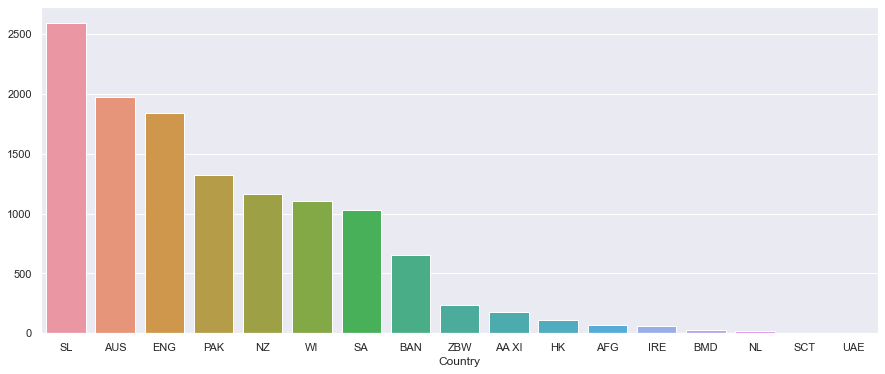

In [11]:
fig=plt.gcf()
fig.set_size_inches(15,6)
sns.barplot(f.index,f.values)

In [12]:
h=dhoni.groupby('How Dismissed').count()
h

,Date,Country,Ground,Runs,B/F,S/R,Format
How Dismissed,,,,,,,
BW,52,52,52,52,52,52,52
CA,167,167,167,167,167,167,167
DN,60,60,60,60,60,60,60
LB,18,18,18,18,18,18,18
NO,126,126,126,126,126,126,126
RN,22,22,22,22,22,22,22
ST,3,3,3,3,3,3,3


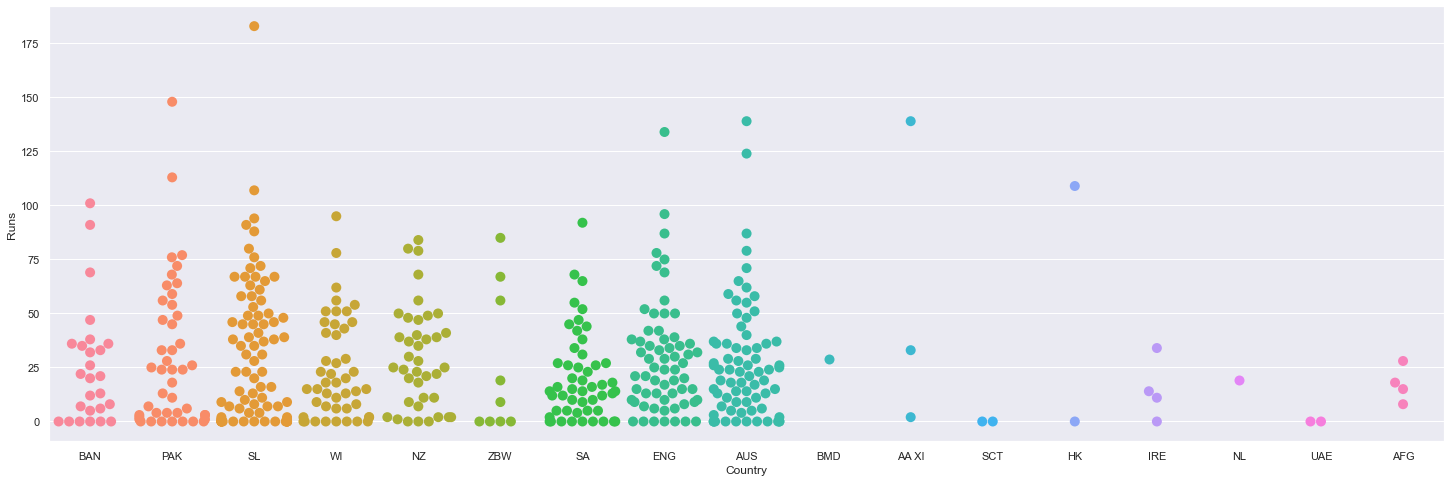

In [13]:
fig=plt.gcf()
fig.set_size_inches(25,8)
sns.swarmplot(x='Country',y='Runs',data=dhoni,size=10,edgecolor='blue');

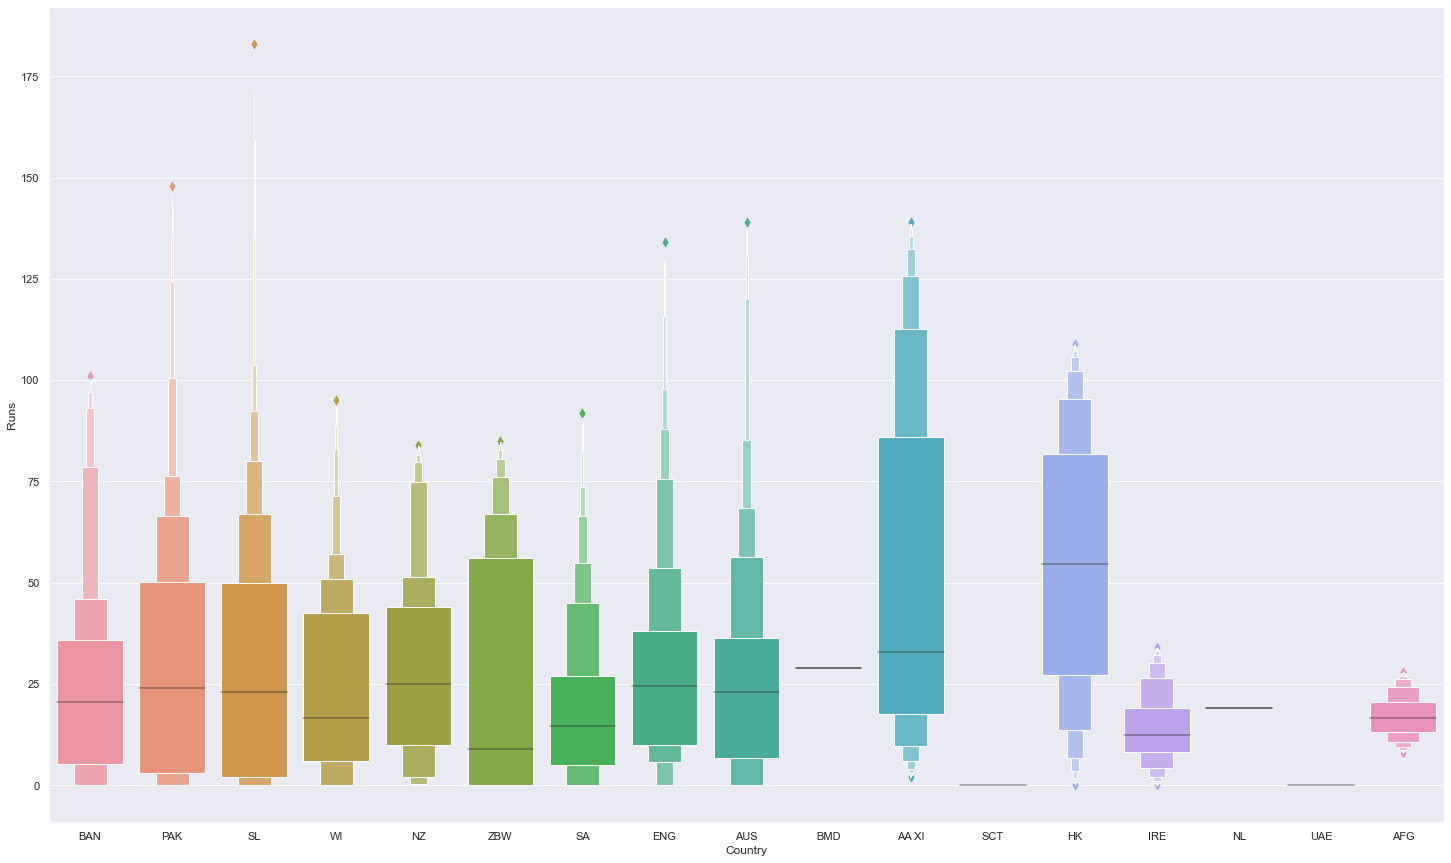

In [14]:
fig=plt.gcf()
fig.set_size_inches(25,15)
sns.boxenplot(x=dhoni.Country,y=dhoni['Runs']);

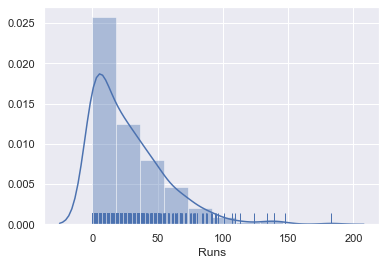

In [15]:
sns.distplot(dhoni.Runs,bins=10,rug=True)

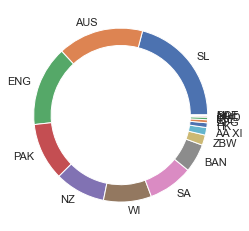

In [16]:
plt.pie(f.values,labels=f.index,wedgeprops=dict(width=0.2));

In [17]:
#o=dhoni[(dhoni['Runs']>=50) and (dhoni['S/R']>=75)]
#o

In [18]:
#i=sns.barplot(o.index,o['S/R'].sort_values(ascending=False));
#i.set_xticklabels(o.index,rotation=90);
#fig=plt.gcf()
#fig.set_size_inches(25,15)


In [19]:
dhoni.dtypes

Date             datetime64[ns]
Country                  object
Ground                   object
How Dismissed            object
Runs                      int64
B/F                       int64
S/R                     float64
Format                   object
dtype: object

In [20]:
dhoni['Year']=dhoni['Date'].dt.year

In [21]:
dhoni

,Date,Country,Ground,How Dismissed,Runs,B/F,S/R,Format,Year
,,,,,,,,,
1,2004-12-23,BAN,MA Aziz Stadium,RN,0,1,0.00,ODI,2004
2,2004-12-26,BAN,Bangabandhu National Stadium,CA,12,11,109.09,ODI,2004
3,2004-12-27,BAN,Bangabandhu National Stadium,NO,7,2,350.00,ODI,2004
4,2005-02-04,PAK,Nehru Stadium (Kochi),CA,3,7,42.86,ODI,2005
5,2005-05-04,PAK,Dr YS Rajasekhara Reddy Cricket Stadium,CA,148,123,120.33,ODI,2005
...,...,...,...,...,...,...,...,...,...
444,2019-06-02,NZ,Westpac Stadium,CA,39,31,125.81,T20,2019
445,2019-08-02,NZ,Eden Park,NO,20,17,117.65,T20,2019
446,2019-10-02,NZ,Seddon Park,CA,2,4,50.00,T20,2019


In [22]:
#x=dhoni[dhoni['Runs']==dhoni.groupby('Year')["Runs"].max()]

In [23]:
dhoni.groupby('Year').max()

,Date,Country,Ground,How Dismissed,Runs,B/F,S/R,Format
Year,,,,,,,,
2004,2004-12-27,BAN,MA Aziz Stadium,RN,12,11,350.00,ODI
2005,2005-12-11,ZBW,Wankhede Stadium,RN,183,145,215.38,ODI
2006,2006-12-04,WI,Warner Park,RN,96,106,216.67,T20
2007,2007-12-05,WI,Wankhede Stadium,RN,139,106,200.00,T20
2008,2008-12-06,SL,Sydney Cricket Ground,RN,109,96,180.00,T20
2009,2009-12-27,WI,Westpac Stadium,RN,124,130,164.29,T20
2010,2010-11-05,WI,Shere Bangla National Stadium,RN,101,107,266.67,T20
2011,2011-12-03,WI,Wankhede Stadium,ST,91,103,192.31,T20
2012,2012-12-30,SL,Wankhede Stadium,NO,113,125,400.00,T20


In [24]:
dhoni.any()

Date             True
Country          True
Ground           True
How Dismissed    True
Runs             True
B/F              True
S/R              True
Format           True
Year             True
dtype: bool

In [25]:
#y

In [26]:
p=dhoni.groupby('Year')['Runs'].max()
p

Year
2004     12
2005    183
2006     96
2007    139
2008    109
2009    124
2010    101
2011     91
2012    113
2013    139
2014     79
2015     92
2016     80
2017    134
2018     52
2019     87
Name: Runs, dtype: int64

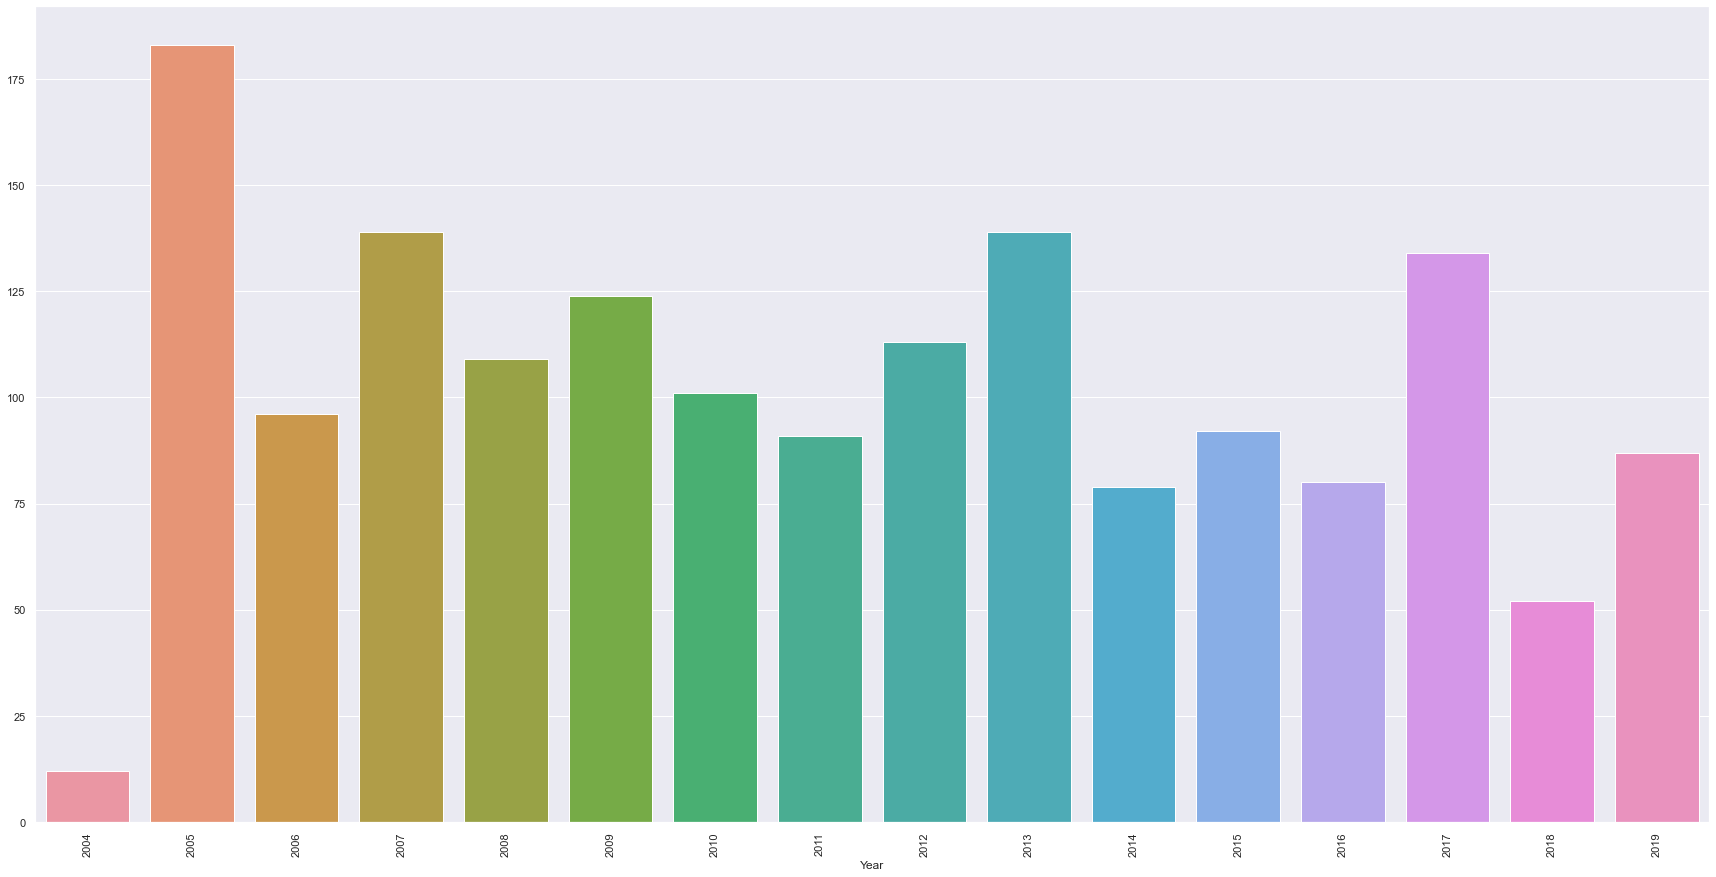

In [27]:
k=sns.barplot(p.index,p.values)
k.set_xticklabels(p.index,rotation=90);
fig=plt.gcf()
fig.set_size_inches(30,15)

C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


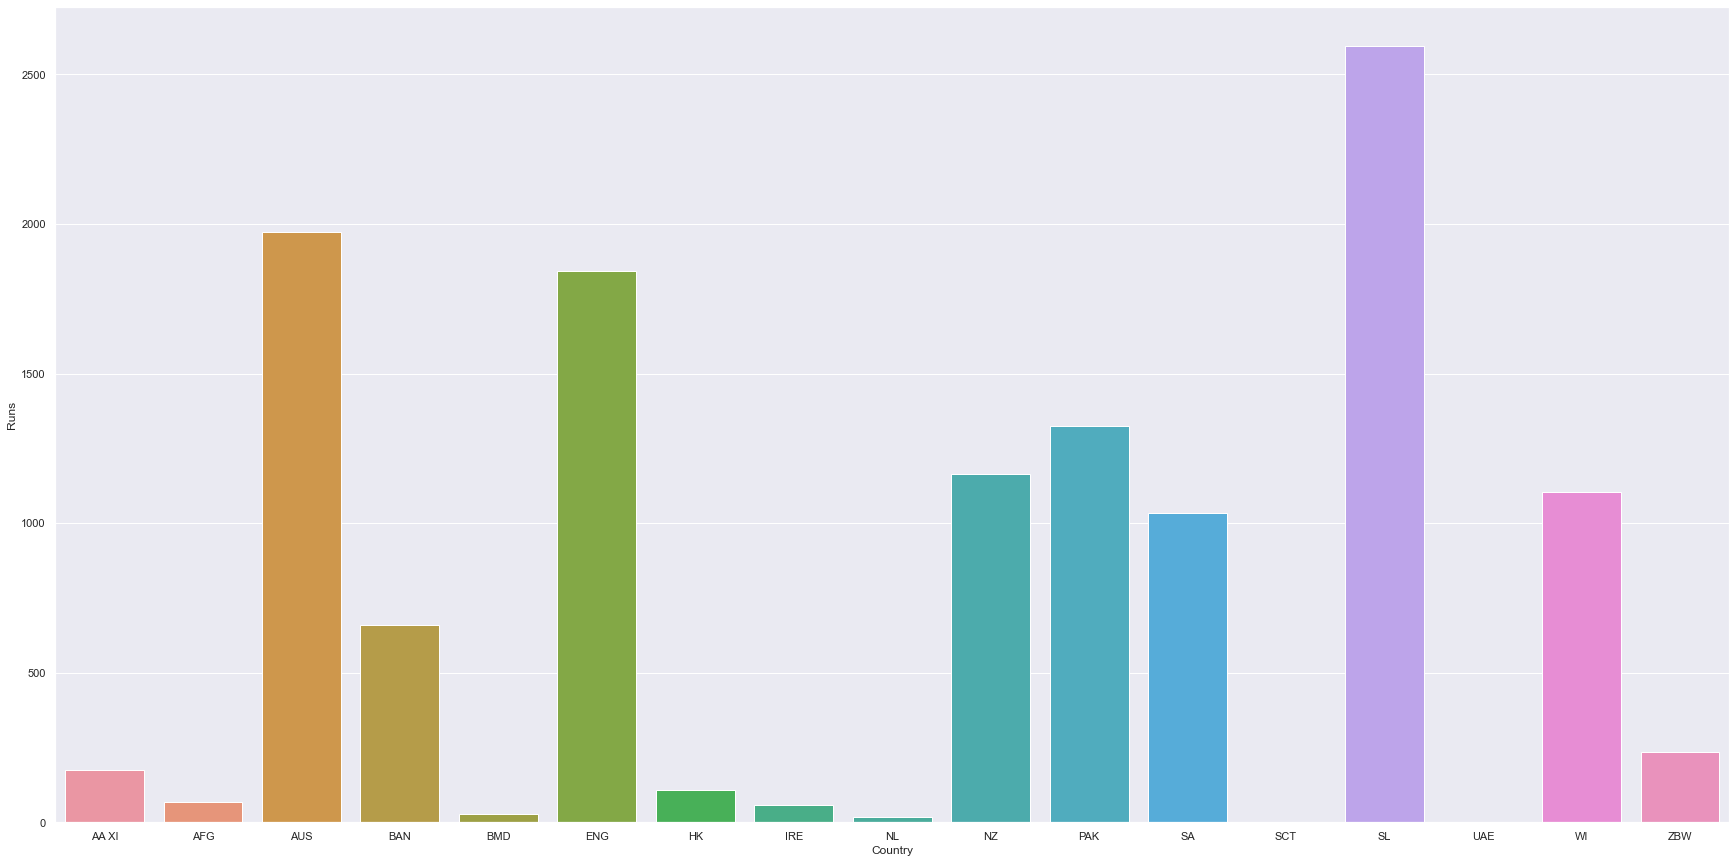

In [28]:
i=pd.DataFrame(dhoni.groupby(['Country'])['Runs','B/F'].sum())
#print(i.sort_values(ascending=False,by='Runs'))
c=sns.barplot(i.index,i['Runs'])
fig=plt.gcf()
fig.set_size_inches(30,15)

In [29]:
#sns.catplot(x="Country",y=)

In [30]:
f=dhoni.groupby(['Country','How Dismissed']).count()

In [31]:
f

Date  Ground  Runs  B/F  S/R  Format  Year
Country How Dismissed                                            
AA XI   BW                1       1     1    1    1       1     1
        NO                1       1     1    1    1       1     1
        RN                1       1     1    1    1       1     1
AFG     LB                1       1     1    1    1       1     1
        NO                2       2     2    2    2       2     2
...                     ...     ...   ...  ...  ...     ...   ...
WI      ST                1       1     1    1    1       1     1
ZBW     BW                1       1     1    1    1       1     1
        CA                1       1     1    1    1       1     1
        DN                4       4     4    4    4       4     4
        NO                3       3     3    3    3       3     3

[65 rows x 7 columns]

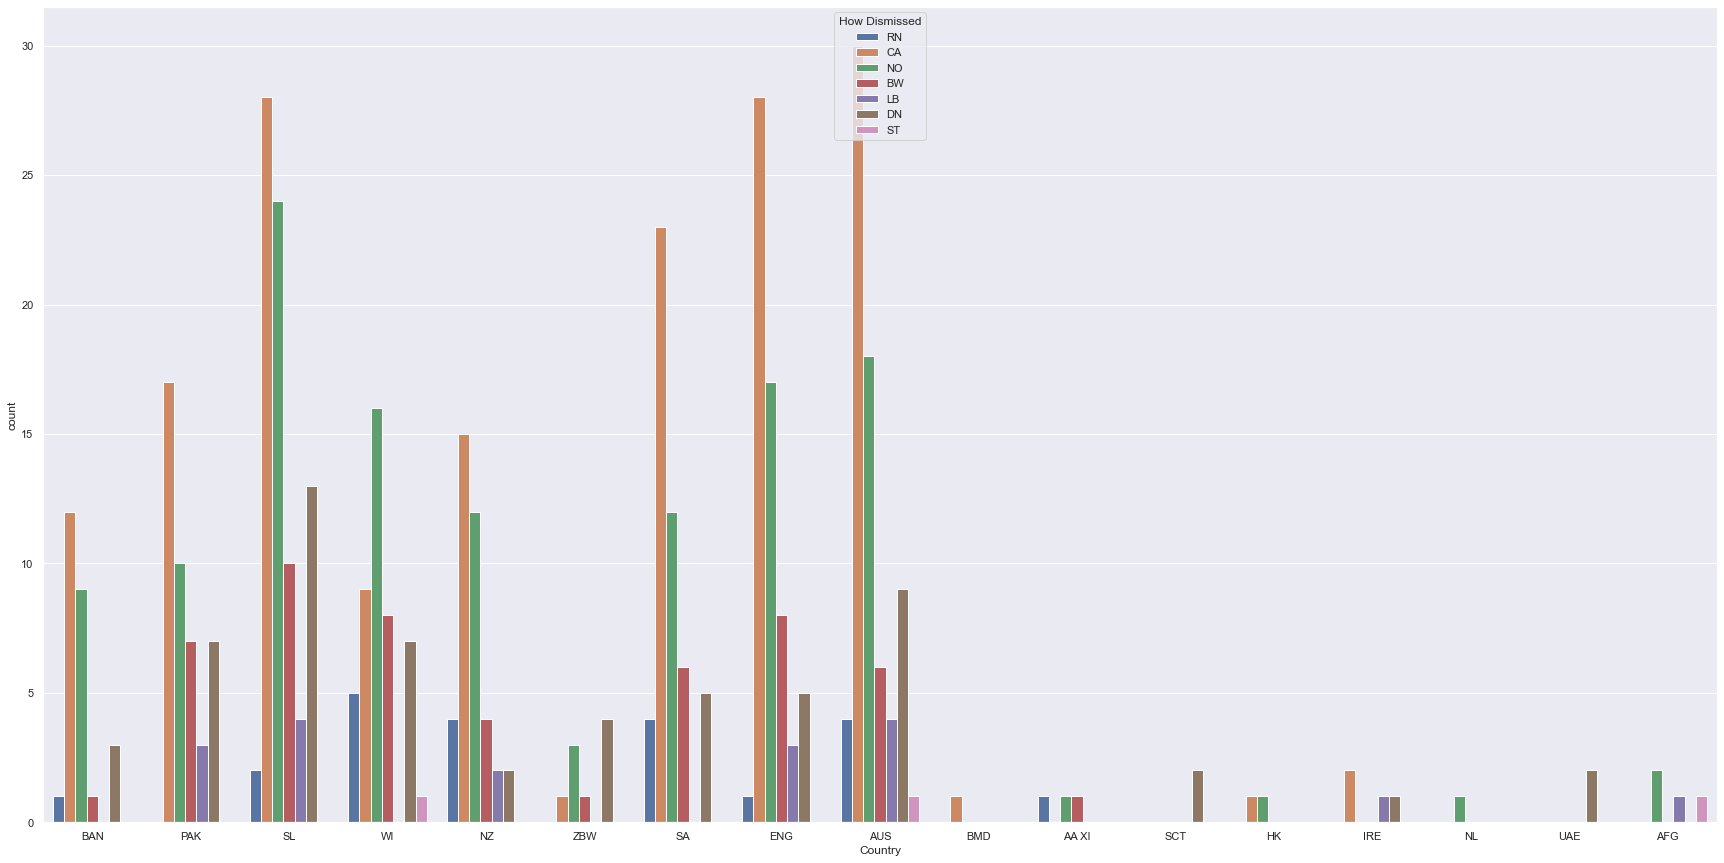

In [32]:
sns.countplot(dhoni['Country'],hue=dhoni['How Dismissed']);
fig=plt.gcf()
fig.set_size_inches(30,15)


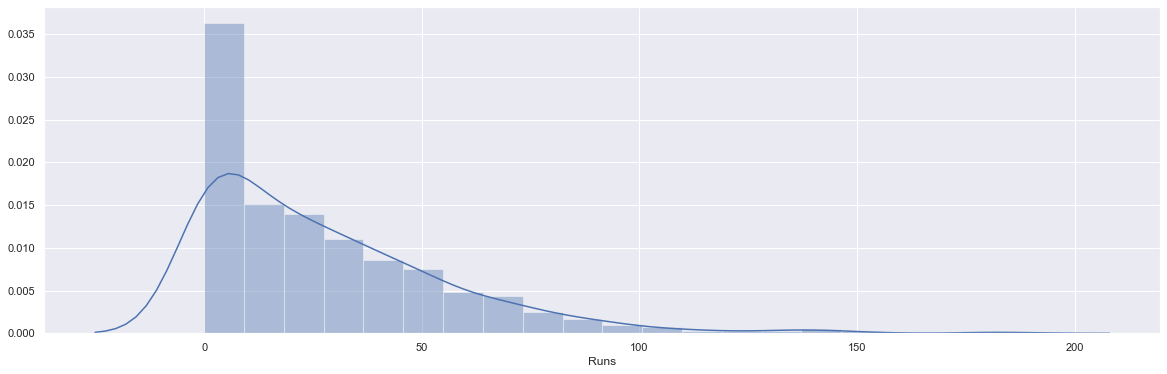

In [33]:
sns.distplot(dhoni.Runs);


fig=plt.gcf()
fig.set_size_inches(20,6)

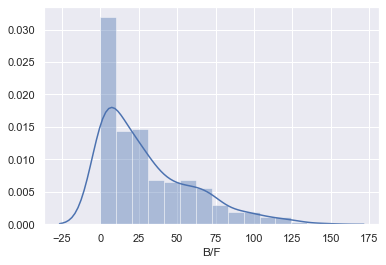

In [34]:
sns.distplot(dhoni['B/F']);

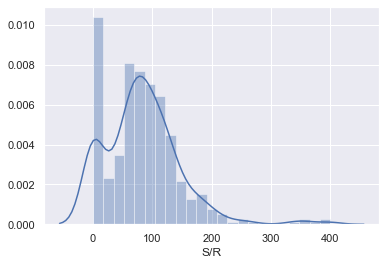

In [35]:
sns.distplot(dhoni['S/R']);

In [36]:
s=['BAN', 'PAK', 'SL', 'WI', 'NZ','SA', 'ENG', 'AUS','AFG']
d=dhoni[dhoni.Country.isin(s)]

In [37]:
gh=pd.crosstab(d.Country,d['How Dismissed'])

In [38]:
gh

How Dismissed,BW,CA,DN,LB,NO,RN,ST
Country,,,,,,,
AFG,0,0,0,1,2,0,1
AUS,6,30,9,4,18,4,1
BAN,1,12,3,0,9,1,0
ENG,8,28,5,3,17,1,0
NZ,4,15,2,2,12,4,0
PAK,7,17,7,3,10,0,0
SA,6,23,5,0,12,4,0
SL,10,28,13,4,24,2,0
WI,8,9,7,0,16,5,1


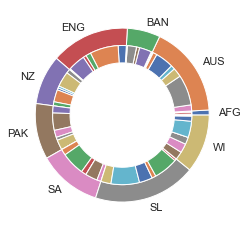

In [39]:
plt.pie(gh.sum(axis=1),labels=gh.index,radius=1,wedgeprops=dict(width=0.2));
plt.pie(gh.values.flatten(),radius=0.8,wedgeprops=dict(width=0.2));

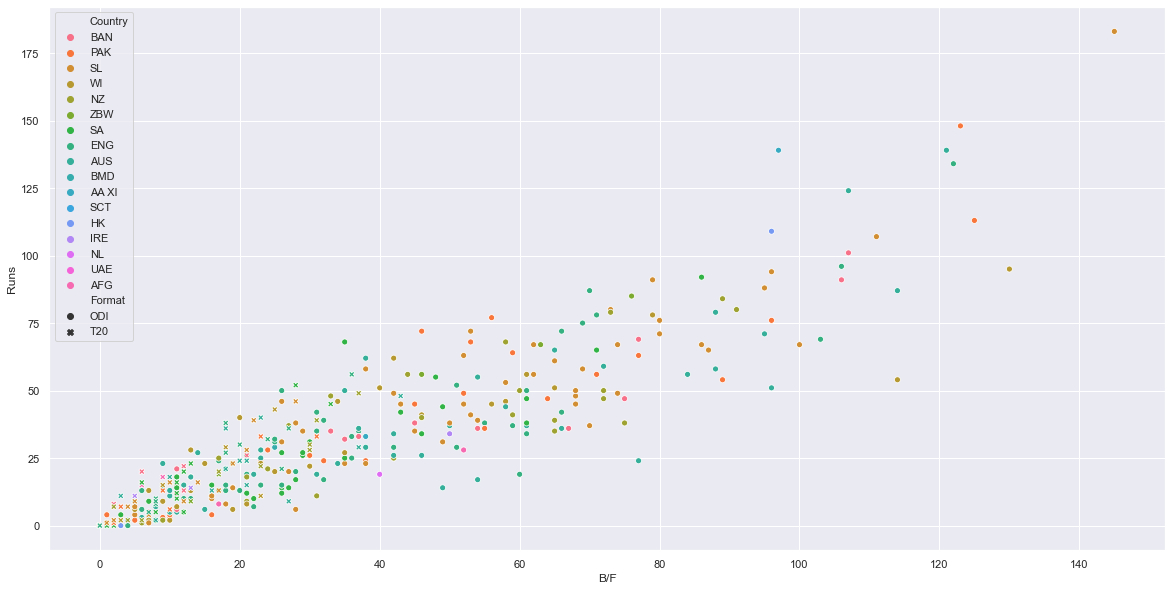

In [40]:
sns.scatterplot(dhoni['B/F'],dhoni.Runs,hue=dhoni['Country'],style=dhoni.Format);
fig=plt.gcf()
fig.set_size_inches(20,10)

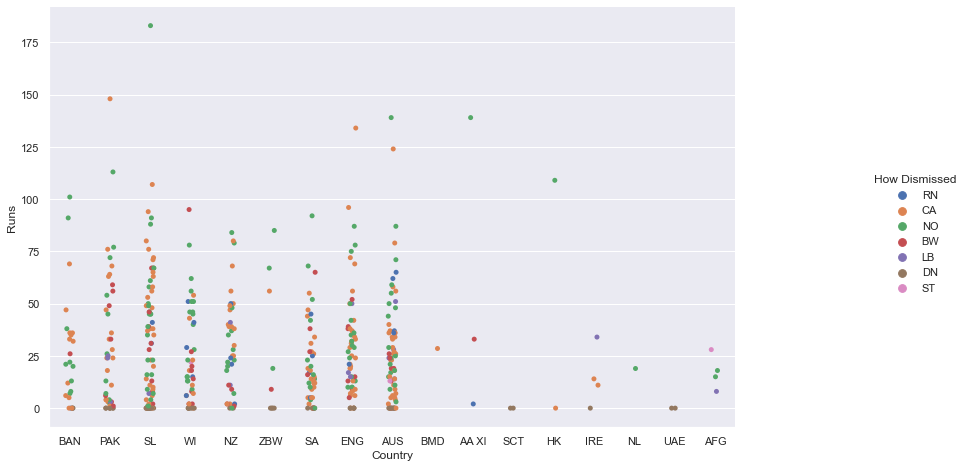

In [41]:
sns.catplot(x="Country",y="Runs",data=dhoni,hue='How Dismissed');
fig=plt.gcf()
fig.set_size_inches(15,7)

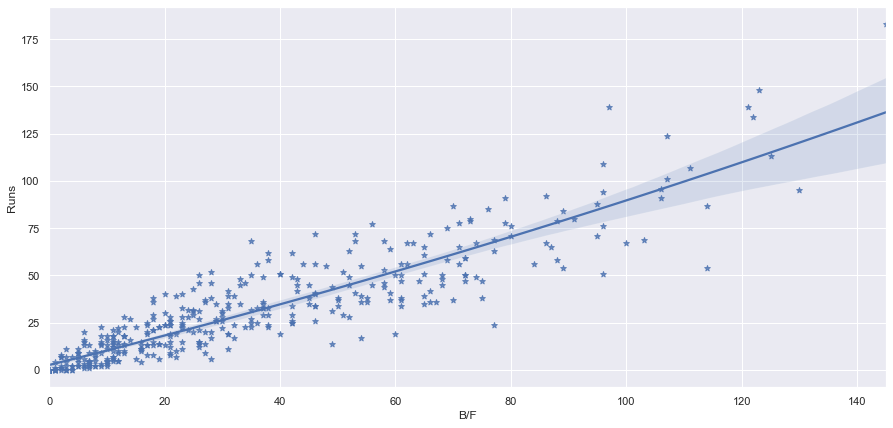

In [42]:
sns.regplot(dhoni['B/F'],dhoni['Runs'],marker='*',order=2);
fig=plt.gcf()
fig.set_size_inches(15,7)

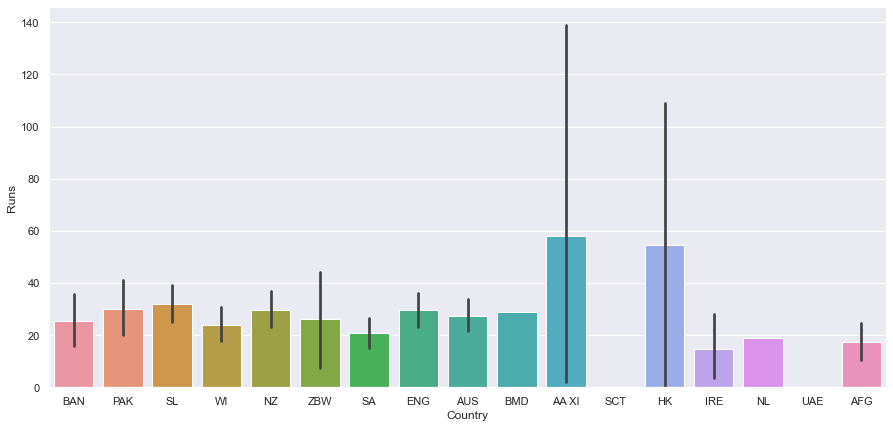

In [43]:
sns.barplot(x='Country',y='Runs',data=dhoni);
fig=plt.gcf()
fig.set_size_inches(15,7)

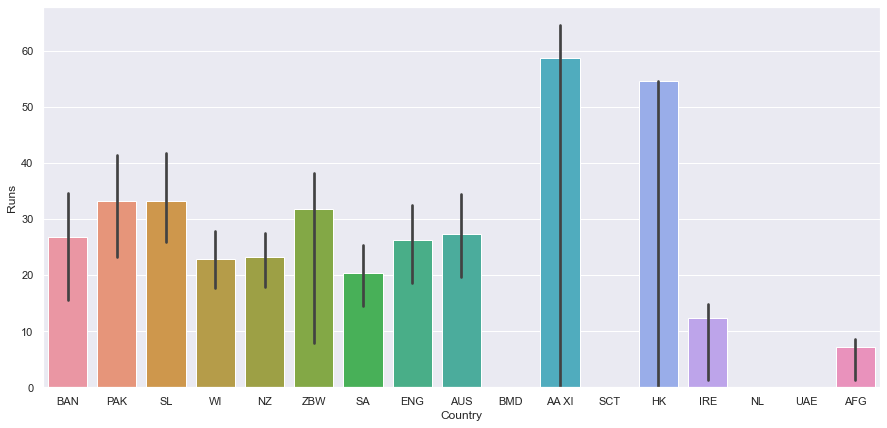

In [44]:
sns.barplot(x='Country',y='Runs',data=dhoni,estimator=np.std);
fig=plt.gcf()
fig.set_size_inches(15,7)

In [91]:
v=dhoni[dhoni['Runs']>=50]
k=v.groupby('Year').count()

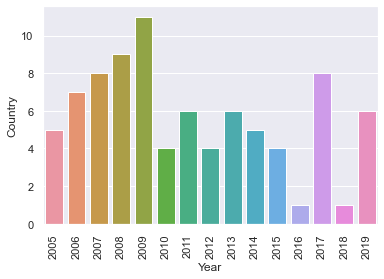

In [92]:
a=sns.barplot(x=k.index,y='Country',data=k);
a.set_xticklabels(k.index,rotation=90);